# Notebook that explore the LMC orbital histories

In [2]:
%pylab inline
import matplotlib as mpl
from pygadgetreader import *
from mpl_toolkits.mplot3d import Axes3D

font = {'size':16, 'family':'serif'}
matplotlib.rc('font', **font)

Populating the interactive namespace from numpy and matplotlib


/usr/local/lib/python2.7/dist-packages/matplotlib/__init__.py:810: UserWarning: Found matplotlib configuration in ~/.matplotlib/. To conform with the XDG base directory standard, this configuration location has been deprecated on Linux, and the new location is now /home/ngaravito/.config/matplotlib/. Please move your configuration there to ensure that matplotlib will continue to find it in the future.
  _get_xdg_config_dir())


|`Simulation`| `ICs` | Time (Gyrs) | Coordinates (kpc $\&$ km/s)|
|--------|---------|---------|--------|
| LMC3 |  |  |  |
| LMC4 | r=(15.938147 184.318269 43.330524), v=(10.949636 -22.197442 -99.102962) | 1.42 | r = (-1.23$\hat{x}$, -43.04$\hat{y}$, -26.82$\hat{z}$), v=(-58$\hat{x}$, -225.28$\hat{y}$, 226.16)$\hat{z}$ | 
| LMC5 |  r=(8.314183 211.882583 122.726527), v=(14.090038 35.727729 -71.808439)  | 2.32 | r = (-0.79$\hat{x}$, -43.96$\hat{y}$, -28.28$\hat{z}$), v=(-62.34$\hat{x}$, -239.11$\hat{y}$, 225.07)$\hat{z}$  | 
| LMC6 | r=(11.584929 247.791118 129.901859),v=(11.910111 11.210542 -77.135969) | 2.38 | r = (-1.18$\hat{x}$, -44.96$\hat{y}$, -27.3$\hat{z}$), v=(-66.8$\hat{x}$, -245.39$\hat{y}$, 229.84)$\hat{z}$ | 


In [ ]:
(array([ 1.42]),
 array([-1.239367]),
 array([-43.044057]),
 array([-26.823212]),
 array([-58.039594]),
 array([-225.288613]),
 array([ 226.168688]))

In [42]:
#Nbody1 = loadtxt('LMCMW-H6.txt')
# Function that reads the data from the Analytic integration
def reading_data(snap_name):
    host = loadtxt('../../../orbits/data/lmc/'+ snap_name +'_host.txt')
    sat = loadtxt('../../../orbits/data/lmc/'+ snap_name +'_sat.txt')
    t = host[:,0] 
    # Defining galactocentric distances and velocities
    x = sat[:,1] - host[:,1] 
    y = sat[:,2] - host[:,2] 
    z = sat[:,3] - host[:,3] 

    vx = sat[:,4] - host[:,4] 
    vy = sat[:,5] - host[:,5] 
    vz = sat[:,6] - host[:,6]        

    Rgal = np.sqrt(x**2.0 + y**2.0 + z**2.0)
    Vgal = np.sqrt(vx**2.0 + vy**2.0 + vz**2.0)
    
    return t, x, y, z, vx, vy, vz, Rgal, Vgal

def ICs(Rgal, cut, x, y, z, vx, vy, vz, t):
    Rcut = np.where(Rgal>=cut)[0]
    return Rgal[Rcut[0]], x[Rcut[0]], y[Rcut[0]], z[Rcut[0]], vx[Rcut[0]], vy[Rcut[0]], vz[Rcut[0]], t[Rcut[0]]
    
def data_host(snap_name):
    host = loadtxt('../../../orbits/data/lmc/'+ snap_name +'_host.txt')
    return host[:,1], host[:,2], host[:,3], host[:,4], host[:,5], host[:,6]

def data_sat(snap_name):
    sat = loadtxt('../../../orbits/data/lmc/'+ snap_name +'_sat.txt')
    return sat[:,1], sat[:,2], sat[:,3], sat[:,4], sat[:,5], sat[:,6]

#Function that reads the N-body simulation orbit
def reading_Nbody(snap_name):
    data = np.loadtxt('orbits/' + snap_name)
    time = data[:,0]
    Rgal = data[:,1]
    x_sat= data[:,2]
    y_sat = data[:,3]
    z_sat = data[:,4]
    x_gal = data[:,5]
    y_gal = data[:,6]
    z_gal = data[:,7]
    Vgal = data[:,8]
    vx_sat = data[:,9]
    vy_sat = data[:,10]
    vz_sat = data[:,11]
    vx_gal = data[:,12]
    vy_gal = data[:,13]
    vz_gal = data[:,14]
    
    return time, Rgal, x_sat, y_sat, z_sat, x_gal, y_gal, z_gal, Vgal, vx_sat, vy_sat, vz_sat, vx_gal, vy_gal, vz_gal
    
def best_values(t, x, y, z, vx, vy, vz):
    x_obs = -1
    y_obs = -41
    z_obs = -28
    vx_obs = -57
    vy_obs = -226
    vz_obs = 221
    Robs = np.sqrt((x_obs-x)**2.0 + (y_obs-y)**2.0 + (z_obs-z)**2.0)
    index = np.where(Robs == min(Robs))[0]
    
    sigma_vx = 13
    sigma_vy = 15
    sigma_vz = 19
    
    dx = x_obs - x[index]
    dy = y_obs - y[index]
    dz = z_obs - z[index]
    
    dvx = vx_obs - vx[index]
    dvy = vy_obs - vy[index]
    dvz = vz_obs - vz[index]
    
    print('Dr = ', dx, dy, dz)
    print('Dv = ', dvx, dvy, dvz)
    
    return t[index], x[index], y[index], z[index], vx[index], vy[index], vz[index]
    

## LMC6

In [59]:
t6, R_gal6,  x_sat, y_sat, z_sat, x_gal, y_gal, z_gal, Vgal, vx_sat, vy_sat, vz_sat, vx_gal, vy_gal, vz_gal = reading_Nbody('LMC6_H1.txt')
best_values(t2, x_sat-x_gal, y_sat-y_gal, z_sat-z_gal, vx_sat-vx_gal, vy_sat-vy_gal, vz_sat-vz_gal)

('Dr = ', array([ 0.188773]), array([ 3.966176]), array([-0.692824]))
('Dv = ', array([ 9.796694]), array([ 19.392623]), array([-8.848162]))


(array([ 2.38]),
 array([-1.188773]),
 array([-44.966176]),
 array([-27.307176]),
 array([-66.796694]),
 array([-245.392623]),
 array([ 229.848162]))

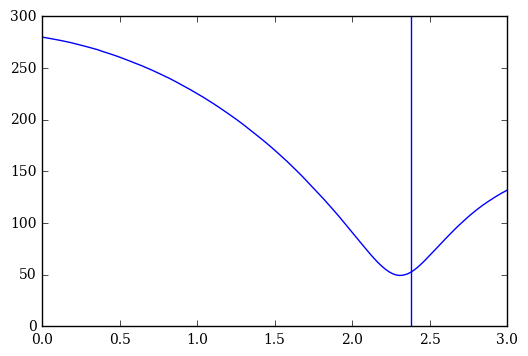

In [52]:
plot(t6, R_gal6)
axvline(2.38)

## LMC5

In [64]:
t5, R_gal5,  x_sat, y_sat, z_sat, x_gal, y_gal, z_gal, Vgal, vx_sat, vy_sat, vz_sat, vx_gal, vy_gal, vz_gal = reading_Nbody('LMC5_H1.txt')
best_values(t2, x_sat-x_gal, y_sat-y_gal, z_sat-z_gal, vx_sat-vx_gal, vy_sat-vy_gal, vz_sat-vz_gal)

('Dr = ', array([-0.206174]), array([ 2.966995]), array([ 0.284428]))
('Dv = ', array([ 5.349816]), array([ 13.110822]), array([-4.077729]))


(array([ 2.32]),
 array([-0.793826]),
 array([-43.966995]),
 array([-28.284428]),
 array([-62.349816]),
 array([-239.110822]),
 array([ 225.077729]))

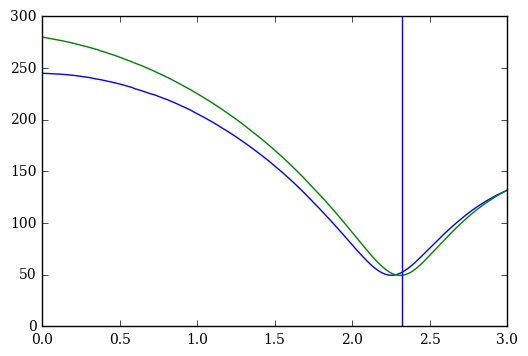

In [56]:
plot(t5, R_gal5)
plot(t6, R_gal6)

axvline(2.32)

## LMC4

In [73]:
t4, R_gal4,  x_sat, y_sat, z_sat, x_gal, y_gal, z_gal, Vgal, vx_sat, vy_sat, vz_sat, vx_gal, vy_gal, vz_gal = reading_Nbody('LMC4_H1.txt')
best_values(t2, x_sat-x_gal, y_sat-y_gal, z_sat-z_gal, vx_sat-vx_gal, vy_sat-vy_gal, vz_sat-vz_gal)

('Dr = ', array([ 0.239367]), array([ 2.044057]), array([-1.176788]))
('Dv = ', array([ 1.039594]), array([-0.711387]), array([-5.168688]))


(array([ 1.42]),
 array([-1.239367]),
 array([-43.044057]),
 array([-26.823212]),
 array([-58.039594]),
 array([-225.288613]),
 array([ 226.168688]))

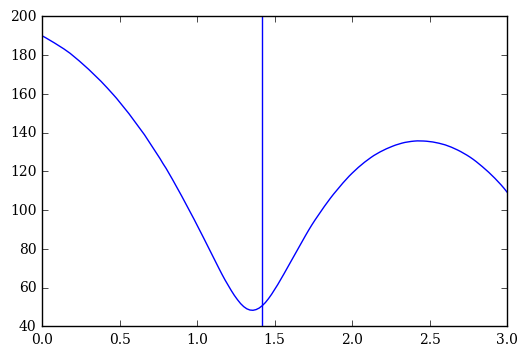

In [79]:
plot(t4, R_gal4)
axvline(1.42)


|Simulation| ICs | 
|--------|---------|
| LMC3 |  | 
| LMC4_H0 | r=(20.392142 266.90138 82.252445), v=(7.370204 -32.65387 7.370204) | 
| LMC4_H1 | r=(15.938147 184.318269 43.330524), v=(10.949636 -22.197442 -99.102962) | 
| LMC4_H2 | r=(15.255384 191.783586 54.76852), v=(11.616064 -11.796171 -94.946403) | 
| LMC4_H3 | r=(14.537944 198.811104 66.078902), v=(12.088886 -2.755792 -90.558497)  | 
| LMC4_H4 | r=(13.810617 205.552718 77.212577), v=(12.40013 5.042759 -86.069407) | 
| LMC5_H1 | r=(8.314183 211.882583 122.726527), v=(14.090038 35.727729 -71.808439)  | 
| LMC6_H1 | r=(11.584929 247.791118 129.901859), v=(11.910111 11.210542 -77.135969)  | 


## LMC3 